In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

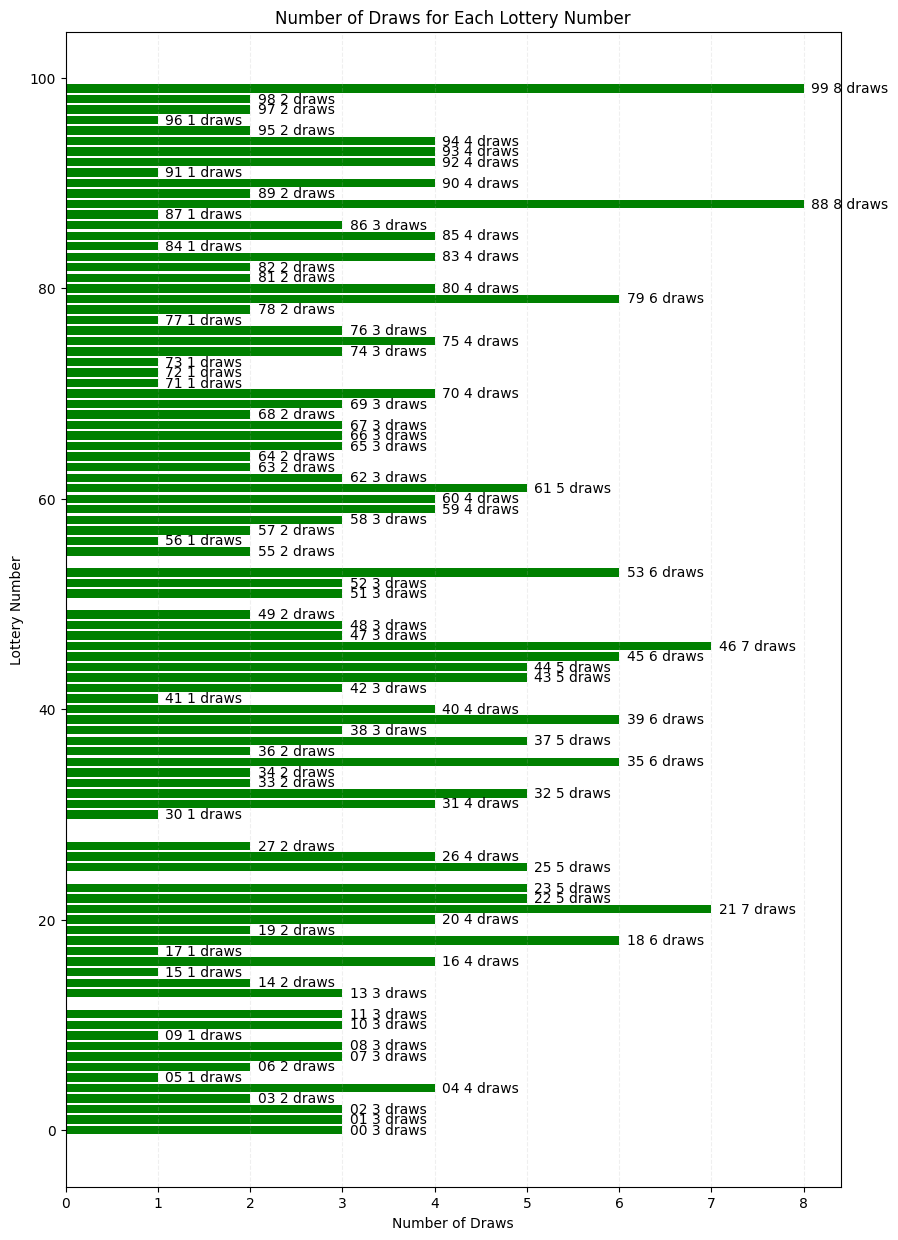

In [10]:
# ---
#Group no.13
# 1.นายอชิระ ชัชวาลย์      6210450385
# 2.นายอภิสิทธิ์ แสงสารพันธ์ 6210450393
# 3.นางสาวรัศมีดาว สุทธิศรี  6210450971

group = 13 # อย่าลืมเปลี่ยนเลขกลุ่ม
problem = 7 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".txt"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"_plot"+str(data_num)+".png"

# อ่านข้อมูล
#สร้างลิสต์ไว้เก็บข้อมูล
data_list = []
#อ่านไฟล์ทีละบรรทัด
with open(data_path, 'r') as file:
    while True:
        date_line = file.readline().strip()
        number_line = file.readline().strip()

        #หยุดอ่านเมื่อถึงจุดสิ้นสุดของไฟล์
        if not date_line or not number_line:
            break

        data_list.append({'Date': date_line, 'Number': number_line})
data = pd.DataFrame(data_list)

#แปลง date colume เป็น datetime
data['Date'] = pd.to_datetime(data['Date'])

# --- เริ่มเขียนโค้ดตรงนี้ ---
#วิเคราะห์ข้อมูล
latest_dates = data.groupby('Number')['Date'].max()
draw_counts = data.groupby('Number')['Date'].size()
date_diffs = (pd.to_datetime('today') - latest_dates).dt.days
data = pd.DataFrame({'Number': latest_dates.index.astype(int), 'DrawCount': draw_counts.values})

max_draws = data['DrawCount'].max()
offset = max_draws * 0.01
plt.figure(figsize=(10, 15))
bars = plt.barh(data['Number'], data['DrawCount'], color="green")
index = 0
for bar in bars:
    width = bar.get_width()  #รับความกว้างแนวนอนของแถบ
    y = bar.get_y() + bar.get_height() / 2  # รับตำแหน่งแนวตั้งของศูนย์ของแถบ
    label_text = f'{data["Number"][index]:02d} {int(width)} draws'#สร้างป้ายชื่อด้วยจำนวนการถูกสุ่ม
    plt.text(width + offset, y, label_text, va='center')
    index += 1

plt.title('Number of Draws for Each Lottery Number')
plt.xlabel('Number of Draws')
plt.ylabel('Lottery Number')
plt.grid(True, axis='x',alpha=0.2,linestyle='--')

max_width = max(data['DrawCount']) + offset
plt.xticks(range(0, int(max_width) + 1, 1))
# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()